In [1]:
# Other ideas
# 

# Introduction



In [11]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Importing of dataset and checking dataset information

Since our data comes from several csv files. We created a column for the city name and a categorical column for whether the purchase was on a weekday. Checking the number of values in the columns, London and Rome have more than 9000 values which is significantly higher than some of the other cities.

We also removed the 'unnamed: 0' column which is a duplicate index column.

In [12]:
def concatcsv(inputfile,output):
    tempdata = pd.read_csv(inputfile)
    tempdata['city'] = inputfile.split('_')[0]
    tempdata['weekdays'] = inputfile.split('_')[1].split('.')[0] == 'weekdays'
    output = pd.concat([output,tempdata],axis=0)
    return output

In [13]:
data = pd.read_csv('amsterdam_weekdays.csv',header='infer')
data['city']='amsterdam'
data['weekdays']=1
data.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekdays
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,1
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,1
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,1
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,1
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,1


In [14]:
data = concatcsv('amsterdam_weekends.csv',data)
data = concatcsv('athens_weekends.csv',data)
data = concatcsv('athens_weekdays.csv',data)
data = concatcsv('barcelona_weekends.csv',data)
data = concatcsv('barcelona_weekdays.csv',data)
data = concatcsv('berlin_weekends.csv',data)
data = concatcsv('berlin_weekdays.csv',data)
data = concatcsv('budapest_weekends.csv',data)
data = concatcsv('budapest_weekdays.csv',data)
data = concatcsv('lisbon_weekends.csv',data)
data = concatcsv('lisbon_weekdays.csv',data)
data = concatcsv('london_weekends.csv',data)
data = concatcsv('london_weekdays.csv',data)
data = concatcsv('paris_weekends.csv',data)
data = concatcsv('paris_weekdays.csv',data)
data = concatcsv('rome_weekends.csv',data)
data = concatcsv('rome_weekdays.csv',data)
data = concatcsv('vienna_weekends.csv',data)
data = concatcsv('vienna_weekdays.csv',data)

In [15]:
data['weekdays'].value_counts()

0    26207
1    25500
Name: weekdays, dtype: int64

In [16]:
data['city'].value_counts()

london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: city, dtype: int64

In [17]:
data.drop(columns=data.columns[0],inplace=True)

In [18]:
print(data.dtypes)

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
city                           object
weekdays                        int64
dtype: object


In [19]:
# print(data.dtypes)
data.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekdays
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128,0.493163
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263,0.499958
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000,0.000000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510,0.000000
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690,0.000000
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885,1.000000
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410,1.000000


# About the dataset: 
    https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities?select=lisbon_weekends.csv
    
    realSum: total price of the airbnb listing (numeric float)
    room_type: Type of room offered (private,shared,etc.) (categorical)
    room_shared: Whether the room_type is shared (boolean)
    room_private: Whether the room_type is private (boolean)
    person_capacity: maximum number of people that can stay in the room (numeric int)
    host_is_superhost: Whether the host is a superhost, which is a verification that the host has been good (boolean)
    multi: Whether the listing is for multiple rooms (boolean)
    biz: Whether the listing is for business purposes (boolean)
    cleanliness_rating: cleanliness rating of room from 1-10 (ordinal categorical)
    guest_satisfaction_overall: overall guest satisfaction rating of room from 1-10 (ordinal categorical)
    bedrooms: number of bedrooms in the listing (ordinal categorical)
    dist: distance from city centre (numeric float)
    metro_dist: distance from nearest metro station (numeric float)
    lng: longitude of listing (numeric float)
    lat: lattitude of listing (numeric float)
    city: city where listing is located (Str)
    weekdays: Whether the listing is on a weekday(1) or weekend(0) (boolean)
    
   

# Cleaing and preparing of dataset

Firstly, we check for any null values or duplicated values.

In [20]:
print(data.isnull().sum())

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
weekdays                      0
dtype: int64


In [48]:
data.duplicated().sum()

0

<AxesSubplot: xlabel='realSum'>

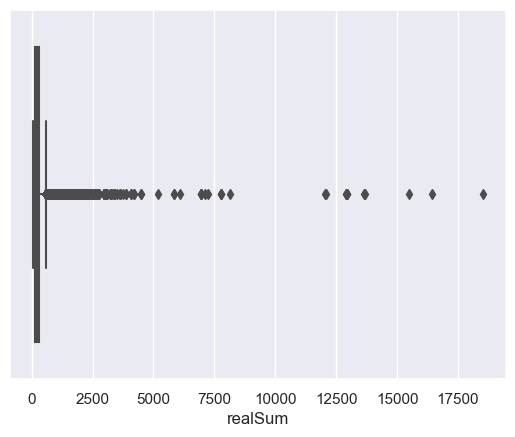

In [21]:
sb.boxplot(x=data['realSum'],orient = 'h')

<AxesSubplot: xlabel='realSum', ylabel='Count'>

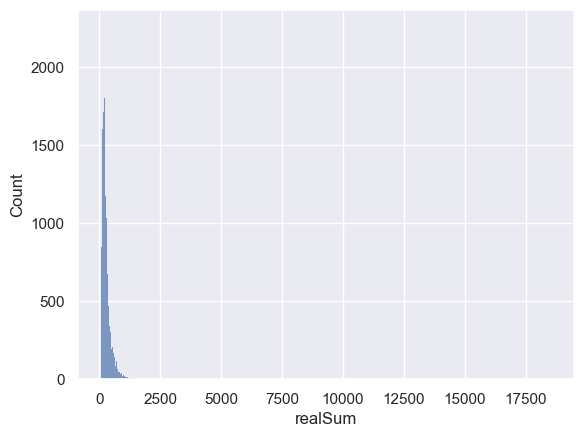

In [22]:
sb.histplot(data=data['realSum'])

In [27]:
data['realSum'].skew()

21.419956563350983

Looking at the boxplot, there appears to be many outliers. The histplot and skew value also indicate that data is positive skewed with many and large outliers at greater values. The median being around 211 but there are many listings above even the 2500 mark.

Next we will remove the outliers from the data using the interquartile range(IQR). Since lower limit is below 0, we do not have any outliers below lower limit. Before removal, we checked the spread of cities and room type in the outliers to make sure we are not removing too many data of a certain attribute. The cities and room type seem proportional to the number of each attribute in our original dataset so we decided to remove these outliers.


# Can consider removing outliers for each city before combining

In [28]:
def outlier(df, col):
    sorted(df[col])
    Q1,Q3 = np.percentile(df[col] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [29]:
lower , upper = outlier(data, 'realSum')
print("lower: ",lower)
print("upper: ",upper)

lower:  -107.660995498034
upper:  576.1074557199221


In [76]:
data['realSum'].quantile(0.9)

500.88004895552956

In [30]:
tempdf = data[data['realSum']>upper]

In [36]:
data['city'].value_counts()

london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: city, dtype: int64

In [31]:
tempdf['city'].value_counts()

london       1332
paris         979
amsterdam     740
barcelona     231
berlin        104
rome           87
lisbon         67
vienna         54
budapest       42
athens         26
Name: city, dtype: int64

In [33]:
data['room_type'].value_counts()

Entire home/apt    32648
Private room       18693
Shared room          366
Name: room_type, dtype: int64

In [32]:
tempdf['room_type'].value_counts()

Entire home/apt    3312
Private room        348
Shared room           2
Name: room_type, dtype: int64

In [37]:
outlierindex = data[data['realSum']>upper].index
data.drop(index=outlierindex, inplace=True)

<AxesSubplot: xlabel='realSum'>

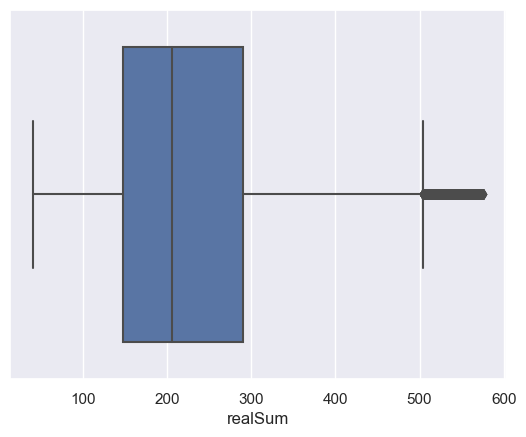

In [38]:
sb.boxplot(x=data['realSum'],orient = 'h')

<AxesSubplot: xlabel='realSum', ylabel='Count'>

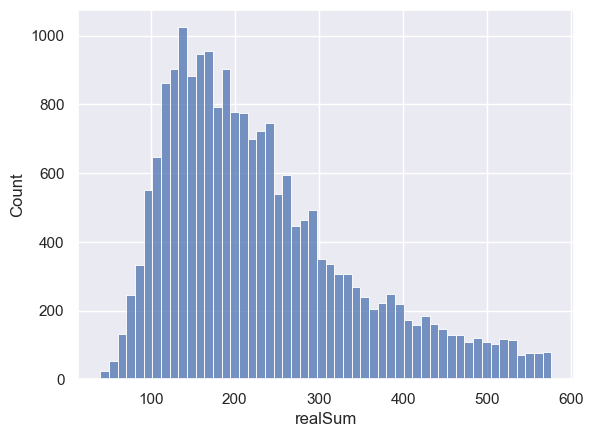

In [39]:
sb.histplot(data=data['realSum'])

In [40]:
data['realSum'].skew()

0.9588883821807196

0       False
1       False
2       False
3       False
6       False
        ...  
1730    False
1731    False
1732    False
1734    False
1735    False
Length: 20260, dtype: bool

In [41]:
data['room_type'].value_counts()

Entire home/apt    12164
Private room        7958
Shared room          138
Name: room_type, dtype: int64

In [49]:
data['room_shared'].value_counts()

False    20122
True       138
Name: room_shared, dtype: int64

In [50]:
data['room_private'].value_counts()

False    12302
True      7958
Name: room_private, dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20260 entries, 0 to 1735
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     20260 non-null  float64
 1   room_type                   20260 non-null  object 
 2   room_shared                 20260 non-null  bool   
 3   room_private                20260 non-null  bool   
 4   person_capacity             20260 non-null  float64
 5   host_is_superhost           20260 non-null  bool   
 6   multi                       20260 non-null  int64  
 7   biz                         20260 non-null  int64  
 8   cleanliness_rating          20260 non-null  float64
 9   guest_satisfaction_overall  20260 non-null  float64
 10  bedrooms                    20260 non-null  int64  
 11  dist                        20260 non-null  float64
 12  metro_dist                  20260 non-null  float64
 13  attr_index                  2026

# Exploratory Data Analysis (EDA)

# a) Numerical Analysis

# b) Categorical Analysis

# b1) Genre

# Bivariate Analysis

# Feature Engineering

https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10

One hot encoding

Creation of new columns

normalization

# Machine learning

# Linear regression

# Logistic regression



# Random Forest Regressor